In [1]:
import os as os
import numpy as np
import matplotlib.pyplot as P
from importlib import reload
import h5py
import FuncMC2d as F
import pprint

/home/vipin/Exosomes/FuncMC2d.py:6: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)


In [2]:
from scipy.spatial import SphericalVoronoi, geometric_slerp

In [124]:
def plot_voronoi(points,sv):
    t_vals = np.linspace(0, 1, 2000)
    fig = P.figure()
    ax = fig.add_subplot(111, projection='3d')
    # plot the unit sphere for reference (optional)
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = np.outer(np.cos(u), np.sin(v))
    y = np.outer(np.sin(u), np.sin(v))
    z = np.outer(np.ones(np.size(u)), np.cos(v))
    # ax.plot_surface(x, y, z, color='y', alpha=0.05)
    # plot generator points
    ax.scatter(points[2:, 0], points[2:, 1], points[2:, 2], c='g')
    # plot Voronoi vertices
#     ax.scatter(sv.vertices[:, 0], sv.vertices[:, 1], sv.vertices[:, 2], c='g')
    #ax.axhline(0.5, ls=':')
    ax.scatter(points[0:2, 0], points[0:2, 1], points[0:2, 2], c='k')
#     ax.scatter(sv.points[0:2, 0], sv.points[0:2, 1], sv.points[0:2, 2], c='r')
    for region in sv._simplices:
        n = len(region)
        for i in range(n):
            start = sv.vertices[region][i]
            end = sv.vertices[region][(i + 1) % n]
            # print(i)
            # print(start)
            # print(end)
            result = geometric_slerp(start, end, t_vals)
            ax.plot(result[..., 0],
                    result[..., 1],
                    result[..., 2],
                    c='k')
    ax.azim = 10
    ax.elev = 40
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    _ = ax.set_zticks([])
    #fig.set_size_inches(4, 4)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    P.show()

def SphVoronoi(rr,R=1,lplot=True):
    Np = np.shape(rr)[0]
    xyz = np.zeros([Np,3])
    for ip in range(Np):
        tht = rr[ip,0]
        phi = rr[ip,1]
        x = R*np.sin(tht)*np.cos(phi)
        y = R*np.sin(tht)*np.sin(phi)
        z = R*np.cos(tht)
        xyz[ip] = np.array([x,y,z])
    sv = SphericalVoronoi(xyz,radius=R)
    if lplot:
        plot_voronoi(xyz,sv)
    return sv

def nearest_neighbour(sv,Np=0):
    if (~Np):
        Np = len(sv.regions)
    n_NNL = np.zeros(Np)
    #
    sces=sv._simplices
    ssort = np.sort(sces,axis=-1)
    ssort = ssort[np.argsort(ssort[:,0])]
    #
    for ip in range(Np):
        NNL_temp = np.unique(ssort[np.where(ssort[:,0]==ip)])
        NNL_temp = np.delete(NNL_temp,np.where(NNL_temp==ip))
        for jp in NNL_temp:
            n_NNL[jp]=n_NNL[jp]+1
        n_NNL[ip]=n_NNL[ip]+len(NNL_temp)
    #
    cn_NNL = np.zeros(Np+1,dtype=int)
    cn_NNL[1:] = np.cumsum(n_NNL)
    print(cn_NNL)
    NNL = np.zeros(cn_NNL[-1],dtype=int)
    filled_NNL = np.zeros(Np,dtype=int)
    #
    for ip in range(Np):
        NNL_temp = np.unique(ssort[np.where(ssort[:,0]==ip)])
        NNL_temp = np.delete(NNL_temp,np.where(NNL_temp==ip))
#         for start in range(cn_NNL[ip]:cn_NNL[ip+1]):
#             if start!=0:
#                 break;
        start=filled_NNL[ip]+cn_NNL[ip]
        for jp in range(start,cn_NNL[ip+1]):
            ind = NNL_temp[jp-start]
            NNL[jp] = ind
            filled_NNL[ip]=filled_NNL[ip]+1
            start_jp=filled_NNL[ind]+cn_NNL[ind]
            NNL[start_jp]=ip
            filled_NNL[ind]=filled_NNL[ind]+1
    return n_NNL,NNL

In [86]:
NNL = np.empty(Np,dtype=object)
a=np.arange(5,dtype=int)
if NNL[0]==None:
    NNL[0]=a
NNL

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [5]:
P.rc('font',size=22)
P.rc('figure',figsize=(8,6))
P.rc('figure.constrained_layout',use=True)
P.rc('xtick',direction='in')
P.rc('ytick',direction='in')
P.rc('xtick.major',size=8,width=2)
P.rc('xtick.minor',visible=True,size=4,width=1)
P.rc('ytick.major',size=8,width=2)
P.rc('ytick.minor',visible=True,size=4,width=1)

[0. 0.]
Eini/N= 103.91191762336538
MC steps 1000
accepted moves 517
Efin/N= 4.6210861548797546e-10
Run over, go home


<IPython.core.display.Javascript object>


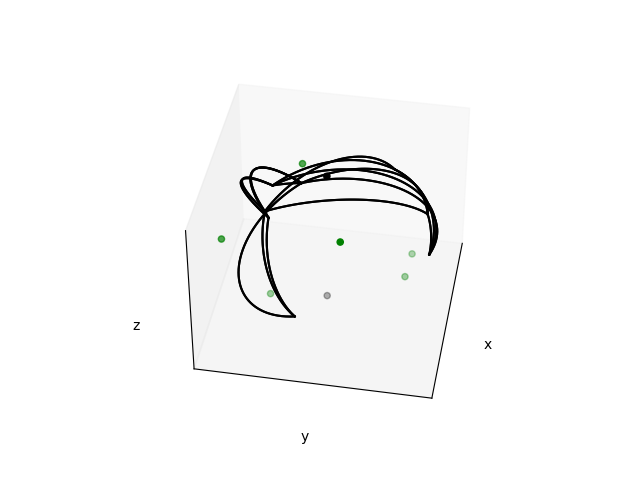

[ 0  4  8 11 15 20 23 26 30]
[4. 4. 3. 4. 5. 3. 3. 4.]


array([3, 4, 6, 7, 2, 4, 5, 7, 1, 4, 7, 0, 5, 6, 7, 0, 1, 2, 5, 6, 1, 3,
       4, 0, 3, 4, 0, 1, 2, 3])

In [129]:
%matplotlib notebook
Np=8
rrini = F.rand_sph(Np)
rr = F.MC_surf(Np,Lone=np.pi,Ltwo=2*np.pi,metric='sph',maxiter=1000,kBT=1.,
                     dfac=Np,interactive=False)
sv = SphVoronoi(rr,lplot=True)
n_NNL,NNL = nearest_neighbour(sv)
print(n_NNL)
NNL

In [130]:
sces = sv._simplices
print(sces)
ssort = np.sort(sces,axis=-1)
ssort = ssort[np.argsort(ssort[:,0])]
print(ssort)

[[0 7 4]
 [0 3 7]
 [5 3 7]
 [2 7 4]
 [6 0 3]
 [6 5 3]
 [6 0 4]
 [6 5 4]
 [1 5 7]
 [1 2 7]
 [1 5 4]
 [1 2 4]]
[[0 4 7]
 [0 3 7]
 [0 3 6]
 [0 4 6]
 [1 5 7]
 [1 2 7]
 [1 4 5]
 [1 2 4]
 [2 4 7]
 [3 5 7]
 [3 5 6]
 [4 5 6]]


In [9]:
R=1
xyz = np.zeros([Np,3])
for ip in range(Np):
    tht = rr[ip,0]
    phi = rr[ip,1]
    x = R*np.sin(tht)*np.cos(phi)
    y = R*np.sin(tht)*np.sin(phi)
    z = R*np.cos(tht)
    xyz[ip] = np.array([x,y,z])
print(xyz)
print(sv.points)

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.22464680e-16  0.00000000e+00 -1.00000000e+00]
 [ 2.68552103e-01  4.05080670e-01 -8.73950467e-01]
 [-6.60759340e-01  7.48868123e-01  5.09276783e-02]]
[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.22464680e-16  0.00000000e+00 -1.00000000e+00]
 [ 2.68552103e-01  4.05080670e-01 -8.73950467e-01]
 [-6.60759340e-01  7.48868123e-01  5.09276783e-02]]


In [126]:
sces = sv._simplices
sces

array([[0, 2, 3],
       [1, 2, 3],
       [1, 0, 3],
       [1, 0, 2]], dtype=int32)

In [6]:
ssort = np.sort(sces,axis=-1)
ssort = ssort[np.argsort(ssort[:,0])]
print(ssort)

[[0 2 5]
 [0 4 6]
 [0 5 6]
 [0 3 4]
 [0 2 3]
 [1 2 5]
 [1 4 6]
 [1 5 6]
 [1 3 4]
 [1 2 3]]


In [26]:
ssort=ssort[np.argsort(ssort[:,1])]
ssort

array([[0, 2, 3],
       [0, 2, 5],
       [1, 2, 5],
       [1, 2, 3],
       [0, 3, 6],
       [1, 3, 6],
       [0, 4, 6],
       [0, 4, 5],
       [1, 5, 6],
       [4, 5, 6]], dtype=int32)

In [77]:
kk

array([[0, 1, 2],
       [0, 1, 4],
       [0, 2, 5],
       [0, 4, 5],
       [1, 3, 6],
       [1, 2, 6],
       [1, 3, 4],
       [2, 5, 6],
       [3, 5, 6],
       [3, 4, 5]], dtype=int32)

In [76]:
n_NNL = nearest_neighbour(sv)
n_NNL

array([ 4.,  4.,  2.,  3., -1., -1., -1.])

In [63]:
kk=ssort[np.argsort(ssort[:,0])]

In [71]:
ssortip = kk[np.where(kk[:,0]==0)]
ssortip

array([[0, 1, 2],
       [0, 1, 4],
       [0, 2, 5],
       [0, 4, 5]], dtype=int32)

In [70]:
np.unique(ssortip)

array([0, 1, 2, 4, 5], dtype=int32)

In [35]:
ssort[np.argsort(ssort[:,0])]

array([[0, 1, 2],
       [0, 1, 4],
       [0, 2, 5],
       [0, 4, 5],
       [1, 3, 6],
       [1, 2, 6],
       [1, 3, 4],
       [2, 5, 6],
       [3, 5, 6],
       [3, 4, 5]], dtype=int32)

In [36]:
ssort[np.argsort(sces[:,1])]

array([[0, 1, 2],
       [0, 1, 4],
       [1, 2, 6],
       [0, 2, 5],
       [1, 3, 6],
       [1, 3, 4],
       [0, 4, 5],
       [3, 4, 5],
       [2, 5, 6],
       [3, 5, 6]], dtype=int32)

In [19]:
a = [1,2]
b = [3,4]

a=np.hstack((a,b))

In [20]:
a

array([1, 2, 3, 4])